In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Input, InputLayer, Flatten
from keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import cv2
from google.colab.patches import cv2_imshow
import os
path = '/content/drive/MyDrive/masters/fuzzy system/github/data/split'

In [5]:
train = '/train'
test = '/test'
validation = '/validation'

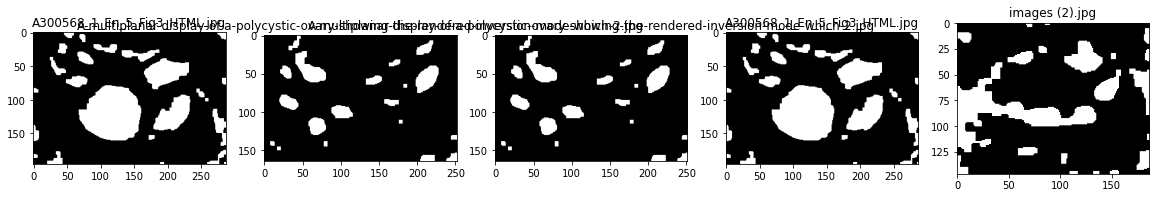

In [6]:
plt.figure(figsize=(20,20))
test_folder= path + test
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img = cv2.imread(image_path, 0)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img, cmap = 'gray')

In [7]:
IMG_WIDTH=200
IMG_HEIGHT=200
train_img_folder= path + train
test_img_folder = path + test
validation_img_folder = path + validation 

In [8]:
def create_dataset(img_folder):
    img_data_array=[]
    #class_name=[]
    #for dir1 in os.listdir(img_folder):
    for file in os.listdir(img_folder):
      image_path= os.path.join(img_folder, file)
      image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
      
      image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
      image=np.array(image)
      image = image.astype('float32')
      #image /= 255 
      #cv2_imshow(image)
      img_data_array.append(image)
      #class_name.append(dir1)
    return img_data_array


# extract the image array and class name
train_img_X = np.array(create_dataset(train_img_folder))
test_img_X = np.array(create_dataset(test_img_folder))
validation_img_X = np.array(create_dataset(validation_img_folder))

In [9]:
import csv

In [10]:
def convert_csv(file_name):
  with open(file_name) as f:
    reader = csv.reader(f)
    data = list(reader)
  #print(data)
  labels = [int(each[0]) for each in data]
  labels = np.array(labels)
  print(labels)
  labels = labels.reshape(-1,1)
  print(labels.shape)

  return labels

In [11]:
train_Y = convert_csv('/content/drive/MyDrive/masters/fuzzy system/github/data/split/train.csv')
test_Y = convert_csv('/content/drive/MyDrive/masters/fuzzy system/github/data/split/test.csv')
validation_Y = convert_csv('/content/drive/MyDrive/masters/fuzzy system/github/data/split/validation.csv')

[1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1]
(25, 1)
[0 1 1 1 1]
(5, 1)
[1 0 1 1 1 1]
(6, 1)


In [12]:
def create_model(input_shape = (IMG_WIDTH, IMG_HEIGHT,1)):
    model = keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Flatten(),
    layers.Dense(units = 54, activation = 'relu'),
    layers.Dense(units = 1, activation = 'softmax')])
    
    return model


In [13]:
def compile_model(model, optimizer='adam', loss='binary_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [14]:
def fitting_model(model, x, y, epoch):
    model.fit(x,y, shuffle = True, epochs = epoch)

In [15]:
model = create_model((IMG_WIDTH,IMG_HEIGHT,1))
#optimizing model
compile_model(model, 'adam', 'binary_crossentropy')

#training model
history = model.fit(train_img_X, train_Y, validation_data = (validation_img_X, validation_Y), batch_size = 10, epochs = 10)
model.save("cnn_digitclass.model")

Epoch 1/10
3/3 [==============================] - 3s 817ms/step - loss: 47.4977 - accuracy: 0.7200 - val_loss: 24.9928 - val_accuracy: 0.8333
Epoch 2/10
3/3 [==============================] - 2s 603ms/step - loss: 26.4864 - accuracy: 0.7200 - val_loss: 6.7708 - val_accuracy: 0.8333
Epoch 3/10
3/3 [==============================] - 2s 601ms/step - loss: 4.3779 - accuracy: 0.7200 - val_loss: 1.7635 - val_accuracy: 0.8333
Epoch 4/10
3/3 [==============================] - 2s 632ms/step - loss: 0.0240 - accuracy: 0.7200 - val_loss: 0.7531 - val_accuracy: 0.8333
Epoch 5/10
3/3 [==============================] - 2s 635ms/step - loss: 0.0268 - accuracy: 0.7200 - val_loss: 0.6065 - val_accuracy: 0.8333
Epoch 6/10
3/3 [==============================] - 2s 589ms/step - loss: 0.0484 - accuracy: 0.7200 - val_loss: 0.5819 - val_accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 2s 594ms/step - loss: 0.0337 - accuracy: 0.7200 - val_loss: 0.7209 - val_accuracy: 0.8333
Epoch 8/10
3/3 [=

In [16]:
results = model.evaluate(test_img_X, test_Y, batch_size=10)

1/1 [==============================] - 0s 108ms/step - loss: 1.2926 - accuracy: 0.8000


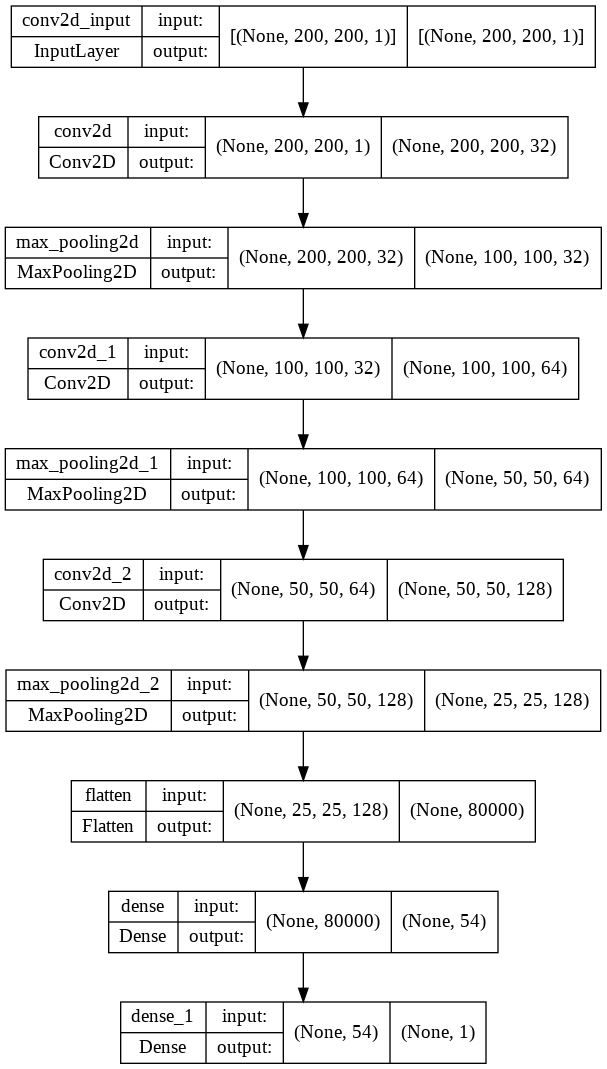

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

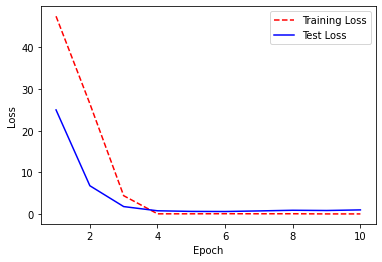

In [19]:
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [20]:
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']